<h1><center><span style="color: red;">$\textbf{Quantum Entanglement}$

<big> $\textbf{Quantum entanglement}$ is a quantum mechanical phenomenon in which the quantum states of two or more objects have to be described with reference to each other, even though the individual objects may be spatially separated.
    
For example, it is possible to prepare two particles in a single quantum state such that when one is observed to be spin-up, the other one will always be observed to be spin-down and vice versa, this despite the fact that it is impossible to predict, according to quantum mechanics, which set of measurements will be observed.

### Quantum entanglement has applications in the emerging technologies of quantum computing and quantum cryptography, and has been used to realize quantum teleportation experimentally.

<h1><center><span style="color: blue;">$\textbf{Bell State or Entanglement circuit}$

<Big>The Bell states are four specific maximally entangled quantum states of two qubits. They are in a superposition of 0 and 1--that is, a linear combination of the two states. Their entanglement means the following:

The qubit held by Alice (subscript "A") can be 0 as well as 1. If Alice measured her qubit in the standard basis, the outcome would be perfectly random, either possibility 0 or 1 having probability 1/2. But if Bob (subscript "B") then measured his qubit, the outcome would be the same as the one Alice got. So, if Bob measured, he would also get a random outcome on first sight, but if Alice and Bob communicated, they would find out that, although their outcomes seemed random, they are perfectly correlated.
    \begin{equation}\begin{aligned}
\textbf{For initial state {00},}\left|\Phi^{+}\right\rangle &=\frac{1}{\sqrt{2}}\left(|0\rangle_{A} \otimes|0\rangle_{B}+|1\rangle_{A} \otimes|1\rangle_{B}\right)(1) \\
\textbf{For initial state {10},}\left|\Phi^{-}\right\rangle &=\frac{1}{\sqrt{2}}\left(|0\rangle_{A} \otimes|0\rangle_{B}-|1\rangle_{A} \otimes|1\rangle_{B}\right)(2) \\
\textbf{For initial state {01},}\left|\Psi^{+}\right\rangle &=\frac{1}{\sqrt{2}}\left(|0\rangle_{A} \otimes|1\rangle_{B}+|1\rangle_{A} \otimes|0\rangle_{B}\right)(3) \\
\textbf{For initial state {11},}\left|\Psi^{-}\right\rangle &=\frac{1}{\sqrt{2}}\left(|0\rangle_{A} \otimes|1\rangle_{B}-|1\rangle_{A} \otimes|0\rangle_{B}\right)(4)
\end{aligned}\end{equation}

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_state_qsphere
from math import pi
from qiskit.quantum_info import Statevector
from IPython.core.display import Image, display
import numpy as np

<Big> lets initialize the qubits to {00} with statevector 

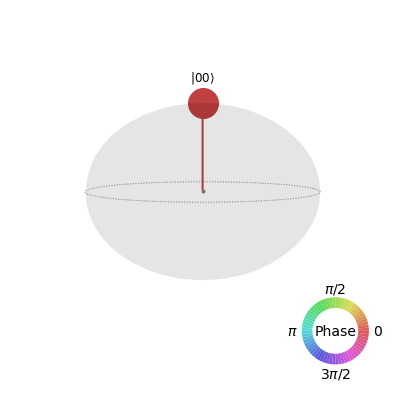

In [2]:
sv = Statevector.from_label('00')
plot_state_qsphere(sv.data)

<Big>lets define our circuit of entanglement 

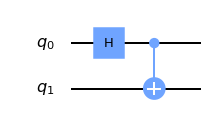

In [3]:
entanglement1 = QuantumCircuit(2)
entanglement1.h(0)
entanglement1.cx(0,1)
entanglement1.draw('mpl')

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


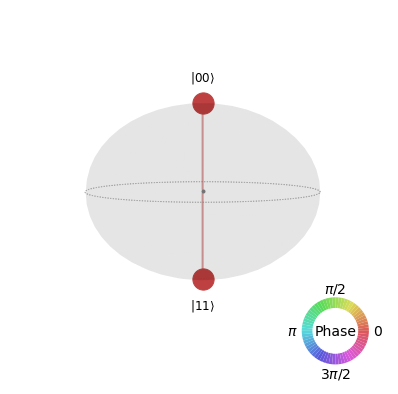

In [4]:
new_sv = sv.evolve(entanglement1)
print(new_sv)
plot_state_qsphere(new_sv.data)

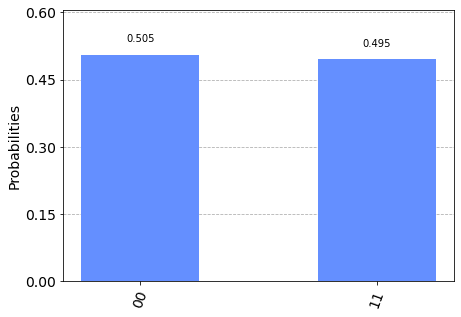

In [5]:
counts = new_sv.sample_counts(shots=1000)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

<Big> lets initialize the qubits to {11} with statevector for $4^{th}$ Bell state

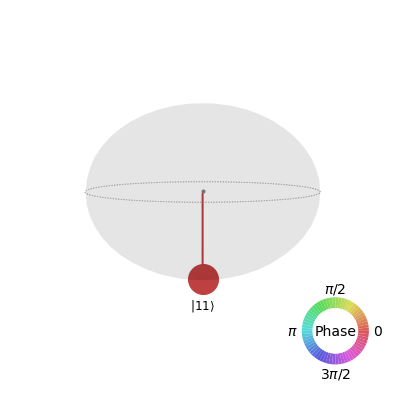

In [6]:
sv = Statevector.from_label('11')
plot_state_qsphere(sv.data)

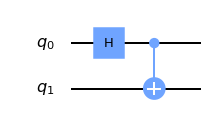

In [7]:
entanglement4 = QuantumCircuit(2)
entanglement4.h(0)
entanglement4.cx(0,1)
entanglement4.draw('mpl')

Statevector([ 0.        +0.j, -0.70710678+0.j,  0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))


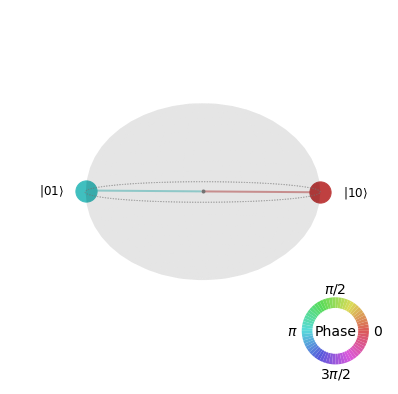

In [8]:
new_sv = sv.evolve(entanglement4)
print(new_sv)
plot_state_qsphere(new_sv.data)

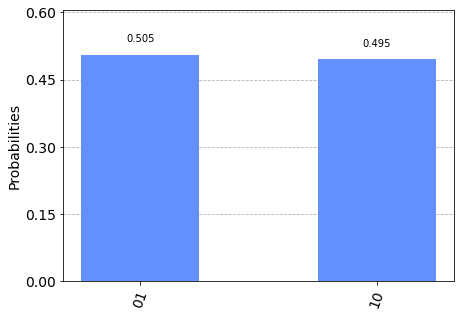

In [9]:
counts = new_sv.sample_counts(shots=1000)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

<h1><center><span style="color: red;">$\textbf{Quantum Teleportation}$

<Big>In quantum teleportation, the properties of quantum entanglement are used to send a spin state (qubit) between observers without physically moving the involved particle. <span style="color: blue ;">The particles themselves are not really teleported, but the state of one particle is destroyed on one side and extracted on the other side, so the information that the state encodes is communicated. The process is not instantaneous, because information must be communicated classically between observers as part of the process. <span style="color: black;">The usefulness of quantum teleportation lies in its ability to send quantum information arbitrarily far distances without exposing quantum states to thermal decoherence from the environment or other adverse effects.

<Big>Alice wants to send quantum information to Bob. Specifically, suppose she wants to send the qubit state       $\textbf{|ψ⟩=α|0⟩+β|1⟩}$ . This entails passing on information about $\textbf{α}$  and  $\textbf{β}$  to Bob. By taking advantage of two classical bits and an entangled qubit pair, Alice can transfer her state  |ψ⟩  to Bob. We call this teleportation because, at the end, Bob will have  |ψ⟩  and Alice won't anymore.

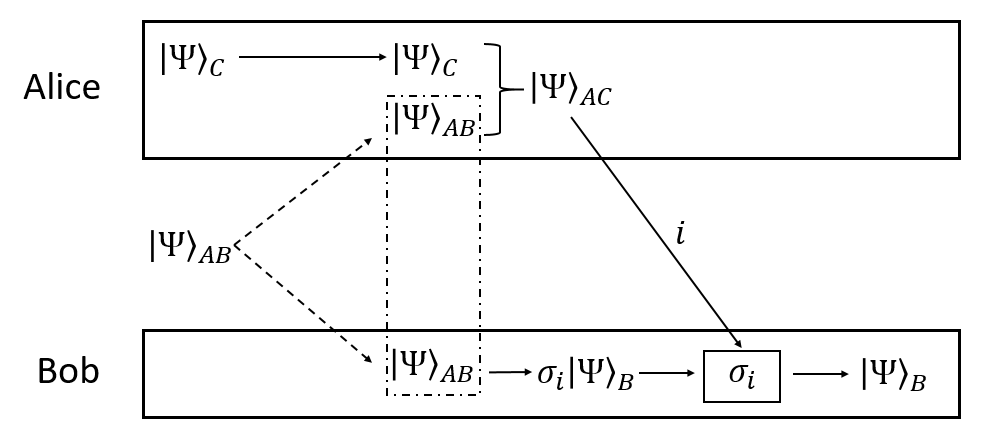

In [10]:
display(Image('https://ds055uzetaobb.cloudfront.net/brioche/uploads/ZmGbUHYGb7-teleport.png', width=800, unconfined=True))

<Big>Lets considered Alice qubit be $$\sqrt{0.70}\vert0\rangle + \sqrt{0.30}\vert1\rangle$$ which is teleported to Bob.

<Big>$\textbf{step 1: Initialization of Alice qubit to given state vector}$

In [11]:
qreg_q = QuantumRegister(3, 'q')
creg_x = ClassicalRegister(1) # first classical register
creg_z = ClassicalRegister(1) # two classical register
Teleportation = QuantumCircuit(qreg_q, creg_x,creg_z)
state_vector=[np.sqrt(0.7)*complex(1,0),np.sqrt(0.3)*complex(1,0)]
Teleportation.initialize(state_vector,(qreg_q[0]))
Teleportation.barrier()
Teleportation.draw()

┌─────────────────────────────┐ ░ 
 q_0: ┤ initialize(0.83666,0.54772) ├─░─
      └─────────────────────────────┘ ░ 
 q_1: ────────────────────────────────░─
                                      ░ 
 q_2: ────────────────────────────────░─
                                      ░ 
c0: 1/══════════════════════════════════
                                        
c1: 1/══════════════════════════════════

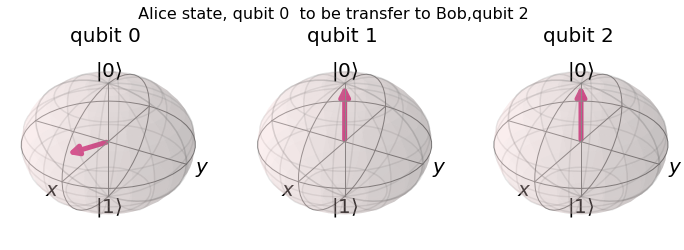

In [12]:
copy1 = Teleportation.copy()
state = Statevector.from_instruction(copy1)
plot_bloch_multivector(state, title=" Alice state, qubit 0  to be transfer to Bob,qubit 2")

<Big>  We apply cx and Hadamard gate to q1 and q2 for Entanglement

In [13]:
Teleportation.h(1)
Teleportation.cx(1,2)
Teleportation.barrier()
Teleportation.cx(0,1)
Teleportation.h(0)
Teleportation.draw()

┌─────────────────────────────┐ ░            ░      ┌───┐
 q_0: ┤ initialize(0.83666,0.54772) ├─░────────────░───■──┤ H ├
      └─────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘
 q_1: ────────────────────────────────░─┤ H ├──■───░─┤ X ├─────
                                      ░ └───┘┌─┴─┐ ░ └───┘     
 q_2: ────────────────────────────────░──────┤ X ├─░───────────
                                      ░      └───┘ ░           
c0: 1/═════════════════════════════════════════════════════════
                                                               
c1: 1/═════════════════════════════════════════════════════════

In [14]:
Teleportation.barrier()


<Big>  $\textbf{Step 2:$ \hspace{0.5cm}$ Applying a Bell measurement on Alice's qubits q0 and q1.}$

In [15]:
Teleportation.measure(0,0)
Teleportation.measure(1,1)
Teleportation.barrier()
Teleportation.draw()

┌─────────────────────────────┐ ░            ░      ┌───┐ ░ ┌─┐    ░ 
 q_0: ┤ initialize(0.83666,0.54772) ├─░────────────░───■──┤ H ├─░─┤M├────░─
      └─────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░ 
 q_1: ────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░─
                                      ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ 
 q_2: ────────────────────────────────░──────┤ X ├─░────────────░──╫──╫──░─
                                      ░      └───┘ ░            ░  ║  ║  ░ 
c0: 1/═════════════════════════════════════════════════════════════╩══╬════
                                                                   0  ║    
                                                                      ║    
c1: 1/════════════════════════════════════════════════════════════════╩════
                                                                      0

<Big>  $\textbf{Step 3:$ \hspace{0.5cm}$ Applying classically controlled operations on Bob's qubit q2 depending on the outcomes of the Bell measurement on Alice's qubits}$

In [16]:
Teleportation.x(2).c_if(creg_x,1)
Teleportation.z(2).c_if(creg_z,1)
Teleportation.draw()

┌─────────────────────────────┐ ░            ░      ┌───┐ ░ ┌─┐    ░ »
 q_0: ┤ initialize(0.83666,0.54772) ├─░────────────░───■──┤ H ├─░─┤M├────░─»
      └─────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░ »
 q_1: ────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░─»
                                      ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ »
 q_2: ────────────────────────────────░──────┤ X ├─░────────────░──╫──╫──░─»
                                      ░      └───┘ ░            ░  ║  ║  ░ »
c0: 1/═════════════════════════════════════════════════════════════╩══╬════»
                                                                   0  ║    »
c1: 1/════════════════════════════════════════════════════════════════╩════»
                                                                      0    »
«                    
« q_0: ──────────────
«                    
« q_1: ──────────────
«       ┌───┐  ┌───┐ 
« q_2: ─┤ X ├──┤ Z ├─
«       └─┬─┘  └─┬─┘ 
«      ┌──┴──┐   │   
«c0: 1/╡ = 1 ╞═══╪═══
«      └─────┘┌──┴──┐
«c1: 1/═══════╡ = 1 ╞
«             └─────┘

 <Big> $\textbf{Step 4:$ \hspace{0.5cm}$ Measuring q2 will determite the Quantum teleportation}$

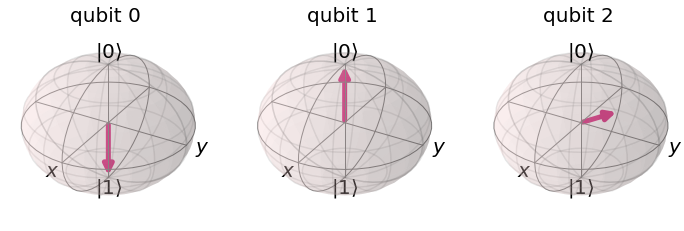

In [19]:
copy2 = Teleportation.copy() 
statevector= Aer.get_backend('statevector_simulator')
psi= execute(copy2,statevector).result().get_statevector()
plot_bloch_multivector(psi)

### Here the qubit 2 is the output gained by Bob which is exactly same of above bloch vector of Alice.